## Import Libraries & Loading Dataset

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

In [21]:
data_train = pd.read_csv("Dataset/fashion-mnist_train.csv")
data_test = pd.read_csv("Dataset/fashion-mnist_test.csv")
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = data_train.drop("label",axis=1).values
y_train = data_train.label.values 
x_test = data_test.drop("label",axis=1).values
y_test = data_test.label.values

In [4]:
image_label = list(zip(x_train.reshape(-1,28,28),y_train))

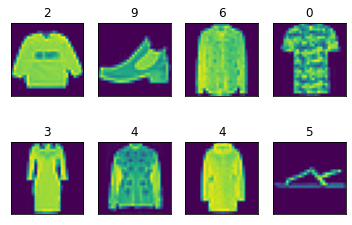

In [5]:
for index,(image,label) in enumerate(image_label[:8]):
    plt.subplot(2,4,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.title(label)

# Model

### KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier(n_neighbors=5,weights="distance",n_jobs=-1)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [7]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.80      0.79      1000
           3       0.92      0.88      0.90      1000
           4       0.80      0.81      0.80      1000
           5       1.00      0.81      0.90      1000
           6       0.66      0.61      0.63      1000
           7       0.87      0.95      0.91      1000
           8       0.97      0.96      0.97      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


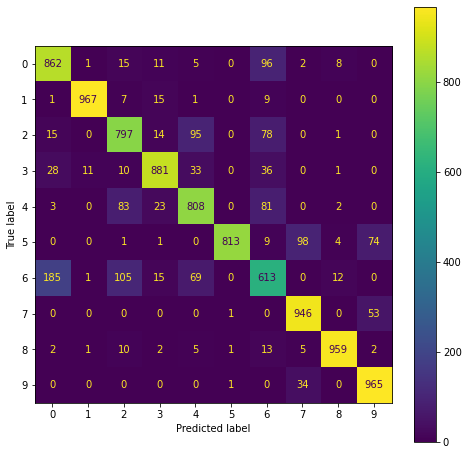

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(knn,x_test,y_test,ax=ax)

### SVC

In [9]:
svc = SVC(C=5)
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)

In [10]:
print(metrics.classification_report(y_test,predict_svc))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.83      0.84      1000
           3       0.91      0.92      0.91      1000
           4       0.84      0.88      0.86      1000
           5       0.98      0.95      0.97      1000
           6       0.78      0.72      0.75      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


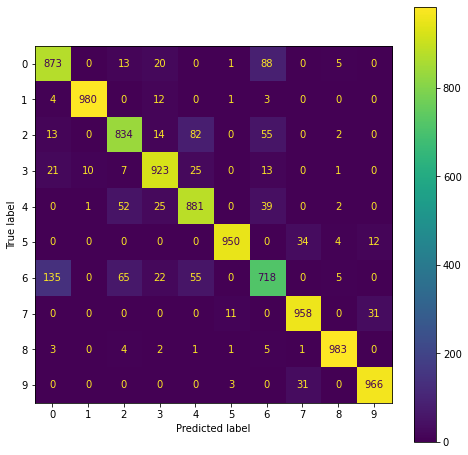

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(svc,x_test,y_test,ax=ax)

### RandomForestClassifier

In [12]:
RF = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=2)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [13]:
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.80      0.81      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.97      0.95      0.96      1000
           6       0.76      0.62      0.68      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


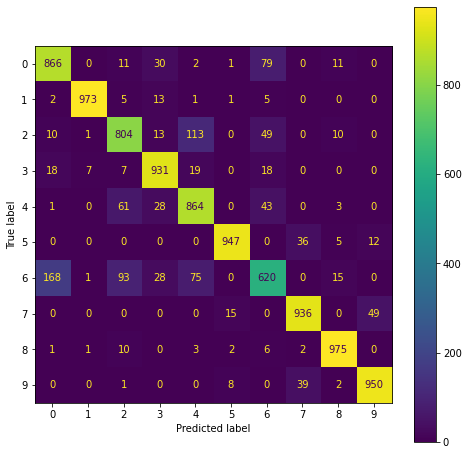

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(RF,x_test,y_test,ax=ax)

### CatBoostClassifier

In [15]:
catboost = CatBoostClassifier(iterations=1000,learning_rate=0.22,eval_metric="Accuracy",task_type="GPU",random_state=4)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 0.6531667	test: 0.6490000	best: 0.6490000 (0)	total: 290ms	remaining: 4m 49s
1:	learn: 0.7086000	test: 0.7086000	best: 0.7086000 (1)	total: 562ms	remaining: 4m 40s
2:	learn: 0.7235333	test: 0.7229000	best: 0.7229000 (2)	total: 826ms	remaining: 4m 34s
3:	learn: 0.7394000	test: 0.7394000	best: 0.7394000 (3)	total: 1.1s	remaining: 4m 33s
4:	learn: 0.7505667	test: 0.7502000	best: 0.7502000 (4)	total: 1.36s	remaining: 4m 31s
5:	learn: 0.7617167	test: 0.7602000	best: 0.7602000 (5)	total: 1.64s	remaining: 4m 32s
6:	learn: 0.7728833	test: 0.7693000	best: 0.7693000 (6)	total: 1.91s	remaining: 4m 31s
7:	learn: 0.7809500	test: 0.7775000	best: 0.7775000 (7)	total: 2.19s	remaining: 4m 31s
8:	learn: 0.7888000	test: 0.7854000	best: 0.7854000 (8)	total: 2.46s	remaining: 4m 31s
9:	learn: 0.7917000	test: 0.7887000	best: 0.7887000 (9)	total: 2.73s	remaining: 4m 30s
10:	learn: 0.7983167	test: 0.7944000	best: 0.7944000 (10)	total: 2.99s	remaining: 4m 28s
11:	learn: 0.8016500	test: 0.7975000	best:

In [16]:
catboost.best_score_

{'learn': {'Accuracy': 0.9921833333333333, 'MultiClass': 0.06864427897135417},
 'validation': {'Accuracy': 0.9089, 'MultiClass': 0.24942724609375}}

In [17]:
predict_cat = catboost.predict(x_test)

In [22]:
print(metrics.classification_report(y_test,predict_cat))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.84      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.95      0.97      1000
           6       0.77      0.74      0.75      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


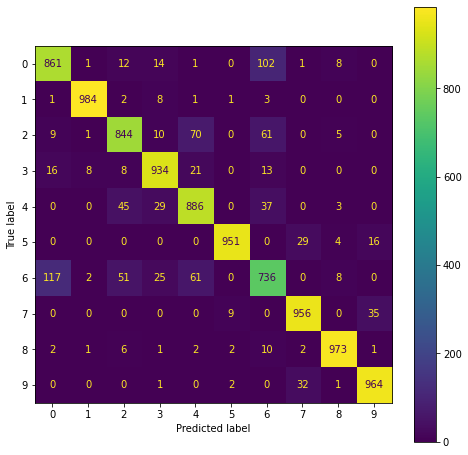

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(catboost,x_test,y_test,ax=ax)

In [19]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn,average='macro'),'Recall': metrics.recall_score(y_test,predict_knn,average='macro'),'F1-score': metrics.f1_score(y_test,predict_knn,average='macro')},
       {"Algorithm":"SVM", 'Accuracy': metrics.accuracy_score(y_test,predict_svc),'Precision': metrics.precision_score(y_test,predict_svc,average='macro'),'Recall': metrics.recall_score(y_test,predict_svc,average='macro'),'F1-score': metrics.f1_score(y_test,predict_svc,average='macro')},
        {"Algorithm":"RandomForest",'Accuracy': metrics.accuracy_score(y_test,predict_rf),'Precision': metrics.precision_score(y_test,predict_rf,average='macro'),'Recall': metrics.recall_score(y_test,predict_rf,average='macro'),'F1-score': metrics.f1_score(y_test,predict_rf,average='macro')},
        {"Algorithm":"Catboost",'Accuracy': metrics.accuracy_score(y_test,predict_cat),'Precision': metrics.precision_score(y_test,predict_cat,average='macro'),'Recall': metrics.recall_score(y_test,predict_cat,average='macro'),'F1-score': metrics.f1_score(y_test,predict_cat,average='macro')}
       ] 

In [20]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.8611,0.863614,0.8611,0.860780
1,SVM,0.9066,0.906303,0.9066,0.906171
2,RandomForest,0.8866,0.885451,0.8866,0.885070
3,Catboost,0.9089,0.908661,0.9089,0.908635
